In [56]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#nltk.download('stopwords')
#nltk.download('punkt')

In [57]:
df = pd.read_csv("main.tsv", sep='\t', encoding='ISO-8859-1');
df.head()

,essay_id,essay_set,essay,teacher_1,teacher_2,teacher_score
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8


In [58]:
df.describe()

,essay_id,essay_set,teacher_1,teacher_2,teacher_score
count,49.00000,49.0,49.000000,49.000000,49.000000
mean,25.00000,1.0,4.102041,3.959184,8.061224
std,14.28869,0.0,1.065460,1.098468,2.085747
min,1.00000,1.0,1.000000,1.000000,2.000000
25%,13.00000,1.0,4.000000,3.000000,7.000000
50%,25.00000,1.0,4.000000,4.000000,8.000000
75%,37.00000,1.0,5.000000,5.000000,9.000000
max,49.00000,1.0,6.000000,6.000000,12.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   essay_id       49 non-null     int64 
 1   essay_set      49 non-null     int64 
 2   essay          49 non-null     object
 3   teacher_1      49 non-null     int64 
 4   teacher_2      49 non-null     int64 
 5   teacher_score  49 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.4+ KB


In [60]:
df.shape

(49, 6)

In [61]:
df.isnull().sum()

essay_id         0
essay_set        0
essay            0
teacher_1        0
teacher_2        0
teacher_score    0
dtype: int64

In [62]:
df[df['essay_set']==1]

,essay_id,essay_set,essay,teacher_1,teacher_2,teacher_score
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8
5,6,1,"Dear @LOCATION1, I think that computers have a...",4,4,8
6,7,1,Did you know that more and more people these d...,5,5,10
7,8,1,@PERCENT1 of people agree that computers make ...,5,5,10
8,9,1,"Dear reader, @ORGANIZATION1 has had a dramatic...",4,5,9
9,10,1,In the @LOCATION1 we have the technology of a ...,5,4,9


In [63]:
df.dropna(axis=1,inplace=True)

In [64]:
df.shape

(49, 6)

In [65]:
df.head()

,essay_id,essay_set,essay,teacher_1,teacher_2,teacher_score
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8


In [66]:
df['essay_set'].value_counts()

1    49
Name: essay_set, dtype: int64

In [67]:
df.drop(columns=['teacher_1','teacher_2'],inplace=True,axis=1)

In [68]:
df.shape

(49, 4)

In [69]:
df.head()

,essay_id,essay_set,essay,teacher_score
0,1,1,"Dear local newspaper, I think effects computer...",8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10
4,5,1,"Dear @LOCATION1, I know having computers has a...",8


In [70]:
min(df['teacher_score'])

2

In [71]:
max(df['teacher_score'])

12

In [72]:
df.skew()

essay_id         0.000000
essay_set        0.000000
teacher_score   -0.730957
dtype: float64

In [73]:
df.kurtosis()

essay_id        -1.200000
essay_set        0.000000
teacher_score    1.058116
dtype: float64

C:\Users\V\AppData\Local\Temp\ipykernel_10628\761264506.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['teacher_score'])


<AxesSubplot: xlabel='teacher_score', ylabel='Density'>

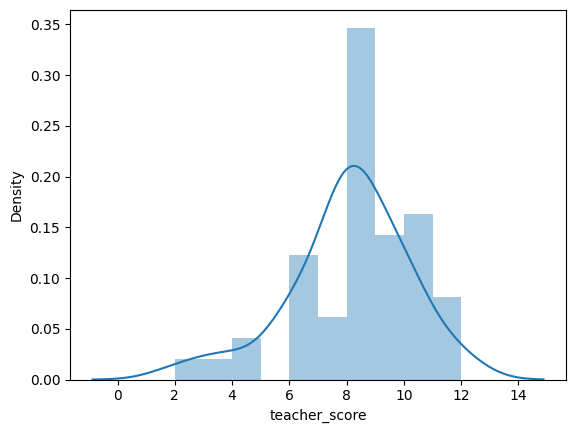

In [74]:
#Check Skewness
sns.distplot(df['teacher_score'])

In [75]:
df[df['essay_set']==1]['teacher_score']

0      8
1      9
2      7
3     10
4      8
5      8
6     10
7     10
8      9
9      9
10     8
11     8
12     7
13     6
14     6
15    12
16     8
17     8
18     4
19     6
20     8
21     3
22    10
23    11
24     8
25     9
26     4
27     9
28     9
29     8
30    10
31    10
32     6
33     8
34     9
35    10
36    12
37     8
38    10
39     7
40     2
41     8
42     6
43     8
44     8
45     8
46     8
47    11
48     6
Name: teacher_score, dtype: int64

In [76]:
min_range = [2,1,0,0,0,0,0,0]
max_range = [12,6,3,3,4,4,30,60]

def normalize(x,mi,ma):
    #print("Before Normalization: "+str(x))
    x = (x-mi)/(ma-mi)
    #print("After Normalization : "+str(x))
    return round(x*10)

df['final_score']=df.apply(lambda x:normalize(x['teacher_score'],min_range[x['essay_set']-1],max_range[x['essay_set']-1]),axis=1)

In [77]:
df['final_score']

0      6
1      7
2      5
3      8
4      6
5      6
6      8
7      8
8      7
9      7
10     6
11     6
12     5
13     4
14     4
15    10
16     6
17     6
18     2
19     4
20     6
21     1
22     8
23     9
24     6
25     7
26     2
27     7
28     7
29     6
30     8
31     8
32     4
33     6
34     7
35     8
36    10
37     6
38     8
39     5
40     0
41     6
42     4
43     6
44     6
45     6
46     6
47     9
48     4
Name: final_score, dtype: int64

C:\Users\V\AppData\Local\Temp\ipykernel_10628\3249593394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['final_score'])


<AxesSubplot: xlabel='final_score', ylabel='Density'>

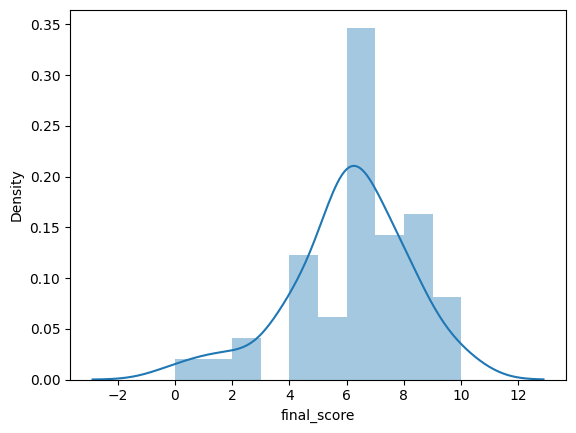

In [78]:
sns.distplot(df['final_score'])

In [79]:
df.skew()

essay_id         0.000000
essay_set        0.000000
teacher_score   -0.730957
final_score     -0.730957
dtype: float64

In [80]:
df.head()

,essay_id,essay_set,essay,teacher_score,final_score
0,1,1,"Dear local newspaper, I think effects computer...",8,6
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,7
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,5
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,8
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,6


In [81]:
df.describe()

,essay_id,essay_set,teacher_score,final_score
count,49.00000,49.0,49.000000,49.000000
mean,25.00000,1.0,8.061224,6.061224
std,14.28869,0.0,2.085747,2.085747
min,1.00000,1.0,2.000000,0.000000
25%,13.00000,1.0,7.000000,5.000000
50%,25.00000,1.0,8.000000,6.000000
75%,37.00000,1.0,9.000000,7.000000
max,49.00000,1.0,12.000000,10.000000


In [82]:
df.drop('teacher_score',axis=1,inplace=True)

In [83]:
df.head()

,essay_id,essay_set,essay,final_score
0,1,1,"Dear local newspaper, I think effects computer...",6
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",7
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",5
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",8
4,5,1,"Dear @LOCATION1, I know having computers has a...",6


In [84]:
def clean_essay(essay):
    x=[]
    for i in essay.split():
        if i.startswith("@"):
            continue
        else:
            x.append(i)
    return ' '.join(x)

df['essay'] = df['essay'].apply(lambda x:clean_essay(x))

In [85]:
stop_words = set(stopwords.words('english')) 
def remove_stop_words(essay):
    word_tokens = word_tokenize(essay) 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
    return ' '.join(filtered_sentence)

df['clean_essay'] = df['essay'].apply(lambda x:remove_stop_words(x))

In [86]:
def remove_puncs(essay):
    essay = re.sub("[^A-Za-z ]","",essay)
    return essay

df['clean_essay'] = df['clean_essay'].apply(lambda x:remove_puncs(x))

In [87]:
df.head()

,essay_id,essay_set,essay,final_score,clean_essay
0,1,1,"Dear local newspaper, I think effects computer...",6,Dear local newspaper I think effects computer...
1,2,1,Dear I believe that using computers will benef...,7,Dear I believe using computers benefit us many...
2,3,1,"Dear, More and more people use computers, but ...",5,Dear More people use computers everyone agre...
3,4,1,"Dear Local Newspaper, I have found that many e...",8,Dear Local Newspaper I found many experts say...
4,5,1,Dear I know having computers has a positive ef...,6,Dear I know computers positive effect people ...


In [88]:
def sent2word(x):
    x=re.sub("[^A-Za-z0-9]"," ",x)
    words=nltk.word_tokenize(x)
    return words

def essay2word(essay):
    essay = essay.strip()
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw = tokenizer.tokenize(essay)
    final_words=[]
    for i in raw:
        if(len(i)>0):
            final_words.append(sent2word(i))
    return final_words
        

def noOfWords(essay):
    count=0
    for i in essay2word(essay):
        count=count+len(i)
    return count

def noOfChar(essay):
    count=0
    for i in essay2word(essay):
        for j in i:
            count=count+len(j)
    return count

def avg_word_len(essay):
    return noOfChar(essay)/noOfWords(essay)

def noOfSent(essay):
    return len(essay2word(essay))

def count_pos(essay):
    sentences = essay2word(essay)
    noun_count=0
    adj_count=0
    verb_count=0
    adverb_count=0
    for i in sentences:
        pos_sentence = nltk.pos_tag(i)
        for j in pos_sentence:
            pos_tag = j[1]
            if(pos_tag[0]=='N'):
                noun_count+=1
            elif(pos_tag[0]=='V'):
                verb_count+=1
            elif(pos_tag[0]=='J'):
                adj_count+=1
            elif(pos_tag[0]=='R'):
                adverb_count+=1
    return noun_count,verb_count,adj_count,adverb_count

data = open('big.txt').read()
words = re.findall('[a-z]+', data.lower())

def check_spell_error(essay):
    essay=essay.lower()
    new_essay = re.sub("[^A-Za-z0-9]"," ",essay)
    new_essay = re.sub("[0-9]","",new_essay)
    count=0
    all_words = new_essay.split()
    for i in all_words:
        if i not in words:
            count+=1
    return count
    
    

In [89]:
df.head()

,essay_id,essay_set,essay,final_score,clean_essay
0,1,1,"Dear local newspaper, I think effects computer...",6,Dear local newspaper I think effects computer...
1,2,1,Dear I believe that using computers will benef...,7,Dear I believe using computers benefit us many...
2,3,1,"Dear, More and more people use computers, but ...",5,Dear More people use computers everyone agre...
3,4,1,"Dear Local Newspaper, I have found that many e...",8,Dear Local Newspaper I found many experts say...
4,5,1,Dear I know having computers has a positive ef...,6,Dear I know computers positive effect people ...


In [90]:
vectorizer = CountVectorizer(max_features = 1000, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(df['clean_essay'])
feature_names = vectorizer.get_feature_names_out()
data = df[['essay_set','clean_essay','final_score']].copy()
X = count_vectors.toarray()
y = data['final_score'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

 Cosine similarity 

In [91]:
import numpy as np

def cosine_similarity_column(df, clean_essay):
  """
  Calculates the cosine similarity of a column in a DataFrame.

  Args:
    df: The DataFrame.
    column_name: The name of the column to calculate the cosine similarity for.

  Returns:
    A DataFrame with the cosine similarity of each row in the column.
  """

  # Get the values in the column.
  values = df[clean_essay].values

  # Convert the values to vectors.
  vectors = np.array([np.array([word_to_vec[word] for word in value.split()]) for value in values])

  # Calculate the cosine similarity.
  cosine_similarities = np.dot(vectors, vectors.T) / (np.linalg.norm(vectors, axis=1) * np.linalg.norm(vectors, axis=1))

  # Return the cosine similarity.
  return pd.DataFrame(cosine_similarities, columns=["cosine_similarity"])


In [92]:
df.head()

,essay_id,essay_set,essay,final_score,clean_essay
0,1,1,"Dear local newspaper, I think effects computer...",6,Dear local newspaper I think effects computer...
1,2,1,Dear I believe that using computers will benef...,7,Dear I believe using computers benefit us many...
2,3,1,"Dear, More and more people use computers, but ...",5,Dear More people use computers everyone agre...
3,4,1,"Dear Local Newspaper, I have found that many e...",8,Dear Local Newspaper I found many experts say...
4,5,1,Dear I know having computers has a positive ef...,6,Dear I know computers positive effect people ...


try 


In [93]:
#Save Trained Model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
pickle.dump(linear_regressor,open("Saved_Models/LR_without_pp",'wb'))

#Use Saved Model
model = pickle.load(open("Saved_Models/LR_without_pp",'rb'))
y_pred = model.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 2.99


In [94]:
#Save Trained Model
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_train, y_train)
pickle.dump(clf,open("Saved_Models/SVR_without_pp",'wb'))

#Use Saved Model
clf = pickle.load(open('Saved_Models/SVR_without_pp', 'rb'))
y_pred=clf.predict(X_test)
print("Mean squared error:%.2f"%mean_squared_error(y_test,y_pred))

Mean squared error:3.96


In [95]:
#Save Trained Model
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)
pickle.dump(rf, open('Saved_Models/RF_without_PP', 'wb'))

#Use Saved Model
rf = pickle.load(open('Saved_Models/RF_without_PP', 'rb'))
predictions = rf.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 3.96


**Machine Learning ALGO's with Pre-processing steps**

In [96]:
pro_data = df.copy()
pro_data['char_count'] = pro_data['essay'].apply(noOfChar)
pro_data['word_count'] = pro_data['essay'].apply(noOfWords)
pro_data['sent_count'] = pro_data['essay'].apply(noOfSent)
pro_data['avg_word_len'] = pro_data['essay'].apply(avg_word_len)
pro_data['spell_err_count'] = pro_data['essay'].apply(check_spell_error)
pro_data['noun_count'], pro_data['adj_count'], pro_data['verb_count'], pro_data['adv_count'] = zip(*pro_data['essay'].map(count_pos))
pro_data.to_csv("Processed_maindata.csv")

In [97]:
prep_df = pd.read_csv("Processed_maindata.csv")
prep_df.drop('Unnamed: 0',inplace=True,axis=1)
prep_df.head()

,essay_id,essay_set,essay,final_score,clean_essay,char_count,word_count,sent_count,avg_word_len,spell_err_count,noun_count,adj_count,verb_count,adv_count
0,1,1,"Dear local newspaper, I think effects computer...",6,Dear local newspaper I think effects computer...,1441,344,16,4.188953,11,76,75,18,24
1,2,1,Dear I believe that using computers will benef...,7,Dear I believe using computers benefit us many...,1765,413,17,4.273608,21,98,84,20,19
2,3,1,"Dear, More and more people use computers, but ...",5,Dear More people use computers everyone agre...,1185,276,14,4.293478,5,76,51,20,16
3,4,1,"Dear Local Newspaper, I have found that many e...",8,Dear Local Newspaper I found many experts say...,2284,490,26,4.661224,31,142,96,39,29
4,5,1,Dear I know having computers has a positive ef...,6,Dear I know computers positive effect people ...,2023,469,30,4.313433,18,110,90,32,36


In [98]:
prep_df.shape

(49, 14)

In [99]:
vectorizer = CountVectorizer(max_features = 10000, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(prep_df['clean_essay'])
feature_names = vectorizer.get_feature_names_out()
X = count_vectors.toarray()
X_full = np.concatenate((prep_df.iloc[:, 5:].to_numpy(), X), axis = 1)
y_full = prep_df['final_score'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size = 0.3)

linear

In [100]:
#Save Trained Model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
pickle.dump(linear_regressor,open("Saved_Models/LR_with_pp",'wb'))

#Use Saved Model
model = pickle.load(open("Saved_Models/LR_with_pp",'rb'))
y_pred = model.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 0.42


In [101]:
#Save Trained Model
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_train, y_train)
pickle.dump(clf,open("Saved_Models/SVR_with_pp",'wb'))

#Use Saved Model
clf = pickle.load(open('Saved_Models/SVR_with_pp', 'rb'))
y_pred=clf.predict(X_test)
print("Mean squared error:%.2f"%mean_squared_error(y_test,y_pred))

Mean squared error:1.46


In [102]:
#Save Trained Model
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)
pickle.dump(rf, open('Saved_Models/RF_with_PP', 'wb'))

#Use Saved Model
rf = pickle.load(open('Saved_Models/RF_with_pp', 'rb'))
y_pred = rf.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 1.11


In [103]:
y_pred

array([3.198, 5.977, 6.358, 7.85 , 6.62 , 7.857, 6.624, 7.9  , 4.531,
       6.068, 7.163, 7.132, 6.163, 3.18 , 4.205])

In [104]:
y_pred = model.predict(X_test)

In [105]:
accuracy = np.mean(y_pred == y_test)

print('Accuracy:', accuracy)

Accuracy: 0.0


tryyyyyy

In [106]:
vectorizer = CountVectorizer(max_features = 10000, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(prep_df['clean_essay'])
feature_names = vectorizer.get_feature_names_out()
X = count_vectors.toarray()
X_full = np.concatenate((prep_df.iloc[:, 6:].to_numpy(), X), axis = 1)
y_full = prep_df['final_score'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size = 0.9)

In [107]:
#Save Trained Model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
pickle.dump(linear_regressor,open("Saved_Models/LR_with_pp",'wb'))

#Use Saved Model
model = pickle.load(open("Saved_Models/LR_with_pp",'rb'))
y_pred = model.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 1.25


In [108]:
y_pred

array([ 1.46698831, 10.23554463,  6.17128689,  4.43380186,  2.45889338,
        5.78425884,  7.99925437,  8.28961071,  5.96527855,  7.54202673,
        5.62006948,  6.67324184,  9.66937467,  5.27486326,  5.48299561,
        6.7082003 ,  4.53030719,  8.22077778,  6.03669816,  9.27875203,
        3.00508205,  0.40111837,  8.73554136,  4.63609723,  5.3217832 ,
        5.25825697,  8.76394696,  3.0893053 ,  1.93424572,  9.92982978,
        8.49331024,  8.97449751,  5.51785792,  5.69213224,  4.93228786,
        6.35237924,  8.89747985,  7.30762479,  3.59187734,  2.42842684,
        5.82562359,  8.67248017,  1.6981961 ,  3.47869214,  7.45987442])

In [109]:
y_pred = model.predict(X_test)

In [110]:
accuracy = np.mean(y_pred == y_test)

print('Accuracy:', accuracy)

Accuracy: 0.0
